In [12]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager,rc
f_name=font_manager.FontProperties(fname='C:/Windows/Fonts/NGULIM.ttf').get_name()
rc('font',family=f_name)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [14]:
data=pd.read_csv("eco jeju/final_dataset.csv")

In [15]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [16]:
data=data[['year','month','date','emd_nm','em_g','total_pop','제주_resd_ratio','제주_resd_pop','card_use_cnt']]

In [17]:
data['year']=data['year'].astype(str)
data['month']=data['month'].astype(str)
data['date']=data['date'].astype(str)
data['base_date']=data['year']+"-"+data['month']+"-"+data['date']
data['base_date']=pd.to_datetime(data['base_date'])

In [18]:
data.drop(['year','month','date'],axis=1,inplace=True)

In [19]:
data['base_date']=pd.to_datetime(data['base_date'])

In [118]:
data.loc[data['emd_nm']=='일도1동']

,emd_nm,em_g,total_pop,제주_resd_ratio,제주_resd_pop,card_use_cnt,base_date
28,일도1동,718950,3127,0.347698,1433.809614,694.0,2018-01-01
66,일도1동,678450,3127,0.341705,1455.311040,535.0,2018-01-02
104,일도1동,657850,3127,0.333806,1429.504323,507.0,2018-01-03
142,일도1동,693850,3127,0.309994,1294.206811,503.0,2018-01-04
180,일도1동,682950,3127,0.349557,1442.244203,512.0,2018-01-05
...,...,...,...,...,...,...,...
50213,일도1동,150900,2542,0.364009,1225.541468,708.0,2021-06-14
50255,일도1동,35700,2542,0.372936,1259.516672,583.0,2021-06-15
50297,일도1동,15650,2542,0.368469,1274.223518,617.0,2021-06-16
50339,일도1동,26650,2542,0.375903,1258.487378,687.0,2021-06-17


In [39]:
dates=pd.date_range('2021-07-01',periods=len(fore[0]))

In [40]:
dates

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
               '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30', '2021-07-31', '2021-08-01',
               '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
               '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-13',
               '2021-08-14', '2021-08-15', '2021-08-16', '2021-08-17',
               '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-21',
               '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
      

# total_pop 예측 

In [164]:
test_df=pd.DataFrame(columns=['emd_nm'])

In [165]:
for region in data['emd_nm'].unique():
    data_pop=data.loc[data['emd_nm']==region,['total_pop','base_date']]
    data_pop.set_index(['base_date'],inplace=True)
    data_pop=data_pop.astype('float32')  
    model=ARIMA(data_pop,order=( 0,1,1))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=80)
    if region=='일도1동':
        forecast=pd.DataFrame(fore[0],columns=['total_pop_pred'],index=pd.date_range('2021-06-19',periods=len(fore[0])))
    else:
        forecast=pd.DataFrame(fore[0],columns=['total_pop_pred'],index=pd.date_range('2021-07-01',periods=len(fore[0])))
    forecast['emd_nm']=region
    test_df=pd.concat([test_df,forecast])

In [166]:
test_df.loc[test_df['emd_nm']=='일도1동']

,emd_nm,total_pop_pred
2021-06-19,일도1동,2541.528842
2021-06-20,일도1동,2541.065647
2021-06-21,일도1동,2540.602451
2021-06-22,일도1동,2540.139256
2021-06-23,일도1동,2539.676060
...,...,...
2021-09-02,일도1동,2506.789172
2021-09-03,일도1동,2506.325976
2021-09-04,일도1동,2505.862781
2021-09-05,일도1동,2505.399585


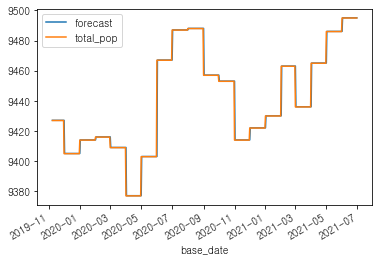

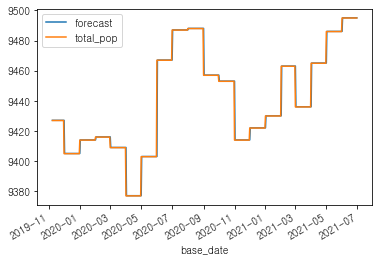

In [167]:
model_fit.plot_predict()

# 제주_resd_ratio 예측

In [168]:
test_ratio=pd.DataFrame(columns=['emd_nm'])

In [169]:
for region in data['emd_nm'].unique():
    data_ratio=data.loc[data['emd_nm']==region,['제주_resd_ratio','base_date']]
    data_ratio.set_index(['base_date'],inplace=True)

    model=ARIMA(data_ratio,order=(5,1,0))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=80)
    if region=='일도1동':
        forecast=pd.DataFrame(fore[0],columns=['제주_resd_ratio'],index=pd.date_range('2021-06-19',periods=len(fore[0])))
    else:
        forecast=pd.DataFrame(fore[0],columns=['제주_resd_ratio'],index=pd.date_range('2021-07-01',periods=len(fore[0])))
    forecast['emd_nm']=region
    test_ratio=pd.concat([test_ratio,forecast])

In [170]:
test_ratio

,emd_nm,제주_resd_ratio
2021-07-01,건입동,0.530226
2021-07-02,건입동,0.539431
2021-07-03,건입동,0.553259
2021-07-04,건입동,0.547566
2021-07-05,건입동,0.538358
...,...,...
2021-09-14,한경면,0.748302
2021-09-15,한경면,0.748325
2021-09-16,한경면,0.748348
2021-09-17,한경면,0.748372


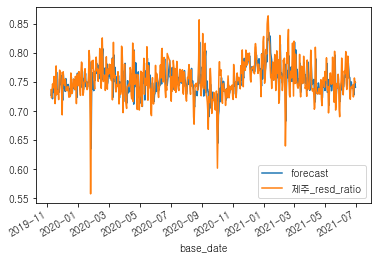

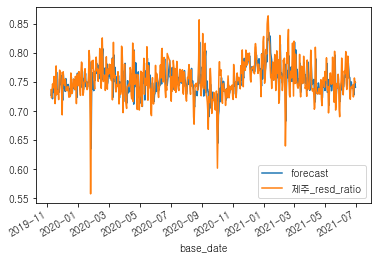

In [171]:
model_fit.plot_predict()

# 제주_resd_pop 예측

In [130]:
test_resd_pop=pd.DataFrame(columns=['emd_nm'])

In [132]:
for region in data['emd_nm'].unique():
    data_resd_pop=data.loc[data['emd_nm']==region,['제주_resd_pop','base_date']]
    data_resd_pop.set_index(['base_date'],inplace=True)
    
    #읍면동 별로 auto_arima로 최적의 p,q,d 구한다.
    model_arima= auto_arima(data_resd_pop,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_resd_pop)
    arima_p=str(auto)[7]
    arima_p=int(arima_p)
    arima_q=str(auto)[9]
    arima_q=int(arima_q)
    arima_d=str(auto)[11]
    arima_d=int(arima_d)
    
    model=ARIMA(data_resd_pop,order=(arima_p,arima_q,arima_d))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=80)
    if region=='일도1동':
        forecast=pd.DataFrame(fore[0],columns=['total_pop_pred'],index=pd.date_range('2021-06-19',periods=len(fore[0])))
    else:
        forecast=pd.DataFrame(fore[0],columns=['total_pop_pred'],index=pd.date_range('2021-07-01',periods=len(fore[0])))
    forecast['emd_nm']=region
    test_resd_pop=pd.concat([test_resd_pop,forecast])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=18558.435, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=18356.906, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=18173.451, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=18174.752, Time=0.84 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=18164.507, Time=1.30 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=18166.506, Time=1.52 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=18517.314, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=18225.452, Time=0.56 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=18174.885, Time=0.56 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=18173.379, Time=1.86 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=18170.498, Time=1.72 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=18340.418, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=18176.735, Time=0.88 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=18177.902, Time=1.18 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=18102.737, Time=1.62

 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=17575.688, Time=0.87 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=17572.859, Time=0.74 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=17492.124, Time=1.60 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=17649.770, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=17574.347, Time=1.11 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=17568.253, Time=0.93 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=17639.662, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=17570.142, Time=1.58 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=17536.587, Time=0.24 sec

Best model:  ARIMA(2,1,3)(0,0,0)[1] intercept
Total fit time: 16.051 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=14353.719, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=14172.879, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=14043.775, Time=0.38 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=14041.026, Time=0.64 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=14042.462

 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=21072.675, Time=0.41 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=21069.787, Time=0.97 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=21057.052, Time=1.23 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=21053.088, Time=1.52 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=21416.051, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=21126.987, Time=0.74 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=21071.289, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=21058.100, Time=1.62 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=21052.805, Time=1.75 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=21234.973, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=21069.102, Time=0.96 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=21069.143, Time=1.26 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=20997.330, Time=1.19 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=21213.652, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=21070.614, Time=1.35

 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=19349.418, Time=2.16 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=19451.469, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=19453.410, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=19348.395, Time=1.67 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=19452.843, Time=0.21 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=inf, Time=1.89 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=19437.078, Time=0.25 sec

Best model:  ARIMA(3,1,2)(0,0,0)[1] intercept
Total fit time: 14.874 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=21288.595, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=21151.339, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=21035.001, Time=0.18 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=21033.133, Time=1.16 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=21033.708, Time=1.32 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=21023.904, Time=1.63 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=21225.946, Time

 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=19449.873, Time=1.33 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=19442.886, Time=1.58 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=19840.349, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=19530.996, Time=0.64 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=19465.562, Time=1.08 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=19464.868, Time=1.67 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=19444.414, Time=1.69 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=19663.666, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=19460.123, Time=0.92 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=19468.551, Time=1.11 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=19411.217, Time=1.78 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=19641.046, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=19462.123, Time=1.17 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=19448.118, Time=1.59 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=19602.515, Time=0.21

 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=16351.387, Time=1.06 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=16342.306, Time=1.44 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=16491.425, Time=0.19 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=16338.257, Time=1.37 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=16341.006, Time=0.25 sec

Best model:  ARIMA(2,1,3)(0,0,0)[1] intercept
Total fit time: 16.148 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=14686.610, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=14563.619, Time=0.23 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=14512.981, Time=0.31 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=14514.273, Time=0.60 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=14515.788, Time=0.73 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=14516.397, Time=0.59 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=14618.406, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=14516.033, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=14514.142

 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=12987.806, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=12989.629, Time=0.72 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=12983.808, Time=1.10 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=12990.636, Time=0.74 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=13095.678, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=12989.692, Time=0.52 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=12986.878, Time=0.98 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=12985.934, Time=1.17 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=13070.309, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=12989.027, Time=0.78 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=12986.405, Time=1.07 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=13038.100, Time=0.19 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=12991.027, Time=1.15 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=13005.426, Time=0.25 sec

Best model:  ARIMA(1,1,3)(0,0,0)[1] intercept
Total fit time:

 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=9271.393, Time=0.53 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=9244.242, Time=0.19 sec

Best model:  ARIMA(5,1,0)(0,0,0)[1] intercept
Total fit time: 9.637 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=8208.177, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=8169.492, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=8153.800, Time=0.30 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=8153.849, Time=0.42 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=8155.420, Time=0.53 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=8150.582, Time=0.90 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=8183.830, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=8140.222, Time=0.24 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=8138.598, Time=0.54 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=8137.023, Time=0.81 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=8152.798, Time=0.51 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=8165.741, Time=0.06 sec

In [133]:
test_resd_pop

,emd_nm,total_pop_pred
2021-07-01,건입동,6372.884657
2021-07-02,건입동,6469.604839
2021-07-03,건입동,6711.142746
2021-07-04,건입동,6619.045947
2021-07-05,건입동,6506.549429
...,...,...
2021-09-14,한경면,7473.673250
2021-09-15,한경면,7476.221051
2021-09-16,한경면,7478.768853
2021-09-17,한경면,7481.316655


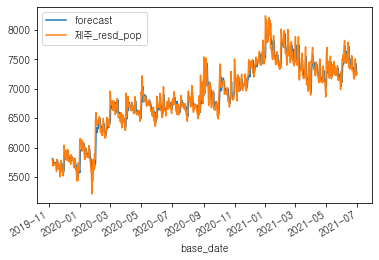

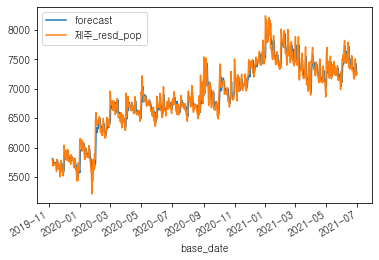

In [134]:
model_fit.plot_predict()

# card_use_cnt 예측

In [135]:
test_card=pd.DataFrame(columns=['emd_nm'])

In [136]:
for region in data['emd_nm'].unique():
    data_card=data.loc[data['emd_nm']==region,['card_use_cnt','base_date']]
    data_card.set_index(['base_date'],inplace=True)
    
    #읍면동 별로 auto_arima로 최적의 p,q,d 구한다.
    model_arima= auto_arima(data_card,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_card)
    arima_p=str(auto)[7]
    arima_p=int(arima_p)
    arima_q=str(auto)[9]
    arima_q=int(arima_q)
    arima_d=str(auto)[11]
    arima_d=int(arima_d)
    
    model=ARIMA(data_card,order=(arima_p,arima_q,arima_d))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=80)
    if region=='일도1동':
        forecast=pd.DataFrame(fore[0],columns=['total_pop_pred'],index=pd.date_range('2021-06-19',periods=len(fore[0])))
    else:
        forecast=pd.DataFrame(fore[0],columns=['total_pop_pred'],index=pd.date_range('2021-07-01',periods=len(fore[0])))
    forecast['emd_nm']=region
    test_card=pd.concat([test_card,forecast])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=17785.804, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=17347.612, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=17252.341, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=17253.946, Time=0.86 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=17244.724, Time=0.78 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=17680.546, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=17268.092, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=17254.101, Time=0.74 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=17247.211, Time=1.26 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=17242.834, Time=1.64 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=17568.858, Time=0.11 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=17246.084, Time=0.60 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=17237.508, Time=1.18 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=17252.008, Time=1.70 sec
 

 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=17917.484, Time=0.91 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=17904.197, Time=0.90 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=17827.931, Time=2.18 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=18181.549, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=17911.741, Time=1.16 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=17903.993, Time=1.66 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=18109.122, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=17896.663, Time=1.47 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=18003.618, Time=0.23 sec

Best model:  ARIMA(2,1,3)(0,0,0)[1] intercept
Total fit time: 18.100 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=15043.171, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=14566.221, Time=0.18 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=14516.153, Time=0.49 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=14515.686, Time=0.61 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=14515.536

 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=19651.344, Time=0.72 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=19642.455, Time=0.96 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=19611.163, Time=1.24 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=19609.971, Time=1.73 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=20166.039, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=19712.169, Time=0.67 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=19647.190, Time=0.81 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=19616.400, Time=1.55 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=19609.623, Time=1.74 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=19981.623, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=19623.423, Time=0.86 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=19607.705, Time=1.19 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=19628.037, Time=1.74 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=19943.322, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=19624.004, Time=1.35

 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=16604.131, Time=1.65 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=16800.672, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=16602.091, Time=1.00 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=16602.991, Time=1.59 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=16752.631, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=16604.049, Time=1.16 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=16721.543, Time=0.23 sec

Best model:  ARIMA(0,1,2)(0,0,0)[1] intercept
Total fit time: 15.961 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=20028.417, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=19569.906, Time=0.33 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=19487.253, Time=0.52 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=19483.999, Time=0.86 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=19481.484, Time=1.35 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=19480.975, Time=1.62 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=19917.212

 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=19290.776, Time=1.29 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=19286.427, Time=1.73 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=19786.777, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=19337.707, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=19304.693, Time=0.91 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=19287.297, Time=1.32 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=19287.506, Time=1.72 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=19632.605, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=19294.149, Time=0.84 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=19281.652, Time=1.05 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=19305.707, Time=1.75 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=19587.714, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=19294.109, Time=1.17 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=19295.264, Time=1.21 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=19533.444, Time=0.18

 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=15156.544, Time=0.91 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=15157.518, Time=0.91 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=15297.903, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=15157.996, Time=1.36 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=15231.405, Time=0.25 sec

Best model:  ARIMA(0,1,2)(0,0,0)[1] intercept
Total fit time: 13.484 seconds
 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=15287.768, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=14785.483, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=14736.678, Time=0.42 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=14737.528, Time=0.55 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=14739.283, Time=1.01 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=14737.984, Time=1.05 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=15094.763, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=14735.773, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=14737.499

 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=14718.905, Time=0.40 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=14729.901, Time=0.53 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=inf, Time=1.82 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=14953.006, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=14718.186, Time=0.58 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=2.12 sec
 ARIMA(3,1,0)(0,0,0)[1] intercept   : AIC=14887.009, Time=0.14 sec
 ARIMA(3,1,1)(0,0,0)[1] intercept   : AIC=14720.094, Time=0.81 sec
 ARIMA(3,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=1.57 sec
 ARIMA(4,1,0)(0,0,0)[1] intercept   : AIC=14837.617, Time=0.17 sec
 ARIMA(4,1,1)(0,0,0)[1] intercept   : AIC=14721.120, Time=0.99 sec
 ARIMA(5,1,0)(0,0,0)[1] intercept   : AIC=14815.184, Time=0.20 sec

Best model:  ARIMA(2,1,1)(0,0,0)[1] intercept
Total fit time: 15.618 seconds
 ARIMA(0,1,0)(

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=8159.156, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=7913.702, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=7904.793, Time=0.26 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=7905.990, Time=0.36 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=7907.526, Time=0.48 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=7909.512, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=8047.339, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=7904.252, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=7906.242, Time=0.57 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=7907.678, Time=0.59 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=7909.546, Time=0.71 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=8006.173, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=7906.237, Time=0.43 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=7908.061, Time=0.71 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=7907.590, Time=0.90 sec
 ARIMA(3,1

In [137]:
test_card

,emd_nm,total_pop_pred
2021-07-01,건입동,2149.200947
2021-07-02,건입동,2243.325359
2021-07-03,건입동,2241.254726
2021-07-04,건입동,2243.218474
2021-07-05,건입동,2225.418252
...,...,...
2021-09-14,한경면,1079.299469
2021-09-15,한경면,1079.659662
2021-09-16,한경면,1080.019855
2021-09-17,한경면,1080.380048


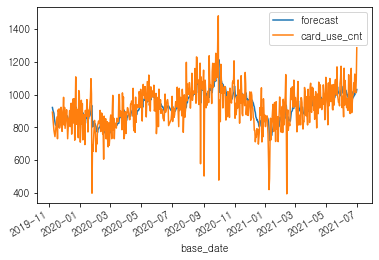

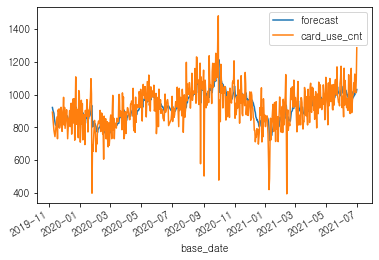

In [138]:
model_fit.plot_predict()

# merge 하기

In [172]:
test_df.reset_index(inplace=True)
test_ratio.reset_index(inplace=True)

In [173]:
test_df.rename(columns={'index':'base_date'},inplace=True)
test_ratio.rename(columns={'index':'base_date'},inplace=True)

In [182]:
merge=pd.merge(test_df,test_ratio,on=['base_date','emd_nm'])

In [142]:
test_resd_pop.reset_index(inplace=True)
test_card.reset_index(inplace=True)
test_resd_pop.rename(columns={'index':'base_date'},inplace=True)
test_card.rename(columns={'index':'base_date'},inplace=True)

In [181]:
test_resd_pop.rename(columns={'total_pop_pred':'제주_resd_pop'},inplace=True)
test_card.rename(columns={'total_pop_pred':'card_use_cnt'},inplace=True)

In [183]:
merge=pd.merge(merge,test_resd_pop,on=['base_date','emd_nm'])
merge=pd.merge(merge,test_card,on=['base_date','emd_nm'])

In [184]:
merge=merge.loc[(merge['base_date']>='2021-07-01')&(merge['base_date']<='2021-08-31')]

In [185]:
merge=merge.sort_values(by=['base_date','emd_nm'])

In [186]:
merge

,base_date,emd_nm,total_pop_pred,제주_resd_ratio,제주_resd_pop,card_use_cnt
0,2021-07-01,건입동,9109.269193,0.530226,6372.884657,2149.200947
3120,2021-07-01,구좌읍,15954.566144,0.743411,13417.495084,1888.344788
80,2021-07-01,남원읍,19353.696457,0.745867,13978.633731,2033.618443
160,2021-07-01,노형동,57474.992388,0.714823,52542.930605,15891.179785
240,2021-07-01,대륜동,15278.294933,0.712074,13747.140968,2945.429814
...,...,...,...,...,...,...
2781,2021-08-31,표선면,12681.923922,0.768739,10573.274340,1405.848020
3341,2021-08-31,한경면,9502.073896,0.747978,7438.004025,1074.256764
3261,2021-08-31,한림읍,24390.743644,0.777801,21237.922148,2876.701236
2861,2021-08-31,화북동,24586.942774,0.719120,24526.529412,5688.235168


In [190]:
merge.to_csv("arimatest_data.csv")

In [191]:
test=pd.read_csv("arimatest_data.csv")

In [192]:
test

,Unnamed: 0,base_date,emd_nm,total_pop_pred,제주_resd_ratio,제주_resd_pop,card_use_cnt
0,0,2021-07-01,건입동,9109.269193,0.530226,6372.884657,2149.200947
1,3120,2021-07-01,구좌읍,15954.566144,0.743411,13417.495084,1888.344788
2,80,2021-07-01,남원읍,19353.696457,0.745867,13978.633731,2033.618443
3,160,2021-07-01,노형동,57474.992388,0.714823,52542.930605,15891.179785
4,240,2021-07-01,대륜동,15278.294933,0.712074,13747.140968,2945.429814
...,...,...,...,...,...,...,...
2599,2781,2021-08-31,표선면,12681.923922,0.768739,10573.274340,1405.848020
2600,3341,2021-08-31,한경면,9502.073896,0.747978,7438.004025,1074.256764
2601,3261,2021-08-31,한림읍,24390.743644,0.777801,21237.922148,2876.701236
2602,2861,2021-08-31,화북동,24586.942774,0.719120,24526.529412,5688.235168
